<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/AVS_03_OU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AVS 03

Caroline Coutinho

Faça o cálculo de uma coluna de destilação fracionada usando o método gráfico McCabe-Thiele, para o mesmo par de compostos da AVS01, com uma pureza no topo de 95% molar e uma razão de refluxo 30% maior que o razão de refluxo mínima.  Use a mesma composição que usou no flash!

Componentes: Benzeno e Tolueno

Primeiro vamos prepar nossos componentes e fazer o diagrama x-y:

In [ ]:
# Preparando kernel
import pandas as pd
!pip3 install pickle5
import pickle5 as pickl
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 132 kB 5.1 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219293 sha256=73187831e9650f5b1bb1e7e18a85aa249f58d5937edb1fbbea74a58598280483
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [ ]:
# Para ler/carregar
with open('databank_properties.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)

In [ ]:
# Carregamento das funções úteis
from OU3_funcoes_uteis_v01 import *

In [ ]:
# Procurando os componentes: 
dados[dados.name.str.contains('toluene', case = False)]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
440,286,TOLUENE,92.141,178.0,383.8,591.7,40.6,316.0,0.264,0.257,0.867,293.0,0.4,-5.817,0.1224,-0.000066,1.173000e-08,467.33,255.24,11.95,29.16,16.0137,3096.52,-53.67,410.0,280.0,56.785,-6283.5,-5.681,4.84,7930.0


In [ ]:
dados[dados.name.str.contains('BENZENE', case = False)]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
14,383,"1,2,3-TRIMETHYLBENZENE",120.195,247.7,449.2,664.5,34.1,430.0,0.270,0.390,0.894,293.0,0.6,-1.658000,0.151300,-0.000079,1.579000e-08,NaN,NaN,-2.29,29.77,16.2121,3670.22,-66.07,479.00,329.0,NaN,NaN,NaN,NaN,9570.0
16,384,"1,2,4-TRIMETHYLBENZENE",120.195,227.0,442.5,649.1,31.9,430.0,0.258,0.390,0.880,289.0,0.3,-1.115000,0.149000,-0.000078,1.523000e-08,872.74,297.75,-3.33,27.95,16.2190,3622.58,-64.59,471.00,324.0,56.241,-7256.56,-5.459,7.270,9380.0
24,385,"1,3,5-TRIMETHYLBENZENE",120.195,228.4,437.9,637.3,30.9,433.0,0.260,0.398,0.865,293.0,0.1,-4.679000,0.160600,-0.000088,1.839000e-08,437.52,268.27,3.84,28.19,16.2893,3614.19,-63.57,466.00,321.0,58.041,-7326.78,-5.706,7.220,9330.0
28,407,"1,4-DIETHYLBENZENE",134.222,231.0,456.9,657.9,27.7,480.0,0.250,0.403,0.862,293.0,0.1,-8.937000,0.207100,-0.000133,3.370000e-08,NaN,NaN,-5.32,32.95,16.1140,3657.22,-71.18,487.00,335.0,NaN,NaN,NaN,NaN,9410.0
45,380,1-METHYL-2-ETHYLBENZENE,120.195,192.3,438.3,651.0,30.0,460.0,0.260,0.294,0.881,293.0,0.0,-3.928000,0.167100,-0.000098,2.228000e-08,NaN,NaN,0.29,31.33,16.1253,3535.33,-65.85,467.00,321.0,64.337,-7662.94,-6.617,7.180,9290.0
46,404,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,451.5,670.0,28.6,NaN,NaN,0.277,0.876,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9809,3564.52,-70.00,481.00,330.0,NaN,NaN,NaN,NaN,0.0
47,405,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,448.3,666.0,29.0,NaN,NaN,0.279,0.861,293.0,0.0,-11.646000,0.216500,-0.000145,3.887000e-08,NaN,NaN,-7.00,0.00,15.9811,3543.79,-69.22,478.00,328.0,67.726,-8033.58,-7.076,8.390,9110.0
48,381,1-METHYL-3-ETHYLBENZENE,120.195,177.6,434.5,637.0,28.0,490.0,0.260,0.360,0.865,293.0,0.0,-6.926000,0.174200,-0.000104,2.388000e+00,8.00,0.00,0.00,-0.46,30.2200,16.15,3521.08,-64.64,463.0,318.000,65.67,-7678.110,-6.815,7.2
49,382,1-METHYL-4-ETHYLBENZENE,120.195,210.8,435.2,640.0,29.0,470.0,0.260,0.322,0.861,293.0,0.0,-6.523000,0.171400,-0.000101,2.279000e-08,463.17,266.08,-0.49,30.28,16.1135,3516.31,-64.23,463.00,318.0,61.404,-7422.59,-6.212,7.230,9180.0
50,406,1-METHYL-4-ISOPROPYLBENZENE,134.222,200.0,450.3,653.0,27.9,NaN,NaN,0.371,0.857,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9424,3539.21,-70.10,480.00,329.0,63.225,-7800.97,-6.432,8.410,0.0


In [ ]:
# Seleção dos componentes presentes no sistema (Benzeno e Tolueno)
lista_componentes = [242, 286]
nc = len(lista_componentes)
nc

2

In [ ]:
# Verificando os pontos de ebulição de nossos componentes a fim de escolher o valor intermediário para nossa T_flash
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[353.3, 383.8]

In [ ]:
# Calculo dos valores de K
K_comp = f_K_Raoult_db(T_eb_comp[0], 760, lista_componentes, dados)[0]
K_comp

array([1.0014828 , 0.38515955])

In [ ]:
# Identificação do menos volátil - componente chave pesado
i_chk = np.argmin(K_comp)
i_chk

1

In [ ]:
# Cálculo da volatilidade relativa - em ralção ao componente chave pesado - i_chk
alpha_comp = K_comp/K_comp[i_chk]
alpha_comp

array([2.60017649, 1.        ])

Antes de começarmos o método de McCabe, iremos plotar o diagrama y-x e em seguida plotar o gráfico com a reta de Flash.

In [ ]:
T_faixa = np.linspace(T_eb_comp[0], T_eb_comp[1], 10)
T_faixa

array([353.3       , 356.68888889, 360.07777778, 363.46666667,
       366.85555556, 370.24444444, 373.63333333, 377.02222222,
       380.41111111, 383.8       ])

In [ ]:
P_eq = 760.0 # mmHg

In [ ]:
x_eq, y_eq = f_sol_ELV_2c_db(T_faixa[1], P_eq, lista_componentes, dados)

In [ ]:
def f_gerar_dados_elv_2c_bd(P_eq, n_pontos, lista_componentes, dados):
    T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
    T_eb_comp = T_eb_comp.tolist()
    T_faixa = np.linspace(T_eb_comp[0], T_eb_comp[1], n_pontos)
    dados_elv = pd.DataFrame({'T': T_faixa})
    for i, T in enumerate(dados_elv['T']):
        x_eq, y_eq = f_sol_ELV_2c_db(T, P_eq, lista_componentes, dados)
        dados_elv.loc[i,'x1'] = x_eq[0]
        dados_elv.loc[i,'y1'] = y_eq[0]
    return dados_elv

In [ ]:
n_pontos = 20
dados_elv = f_gerar_dados_elv_2c_bd(P_eq, n_pontos, lista_componentes, dados)
dados_elv

,T,x1,y1
0,353.300000,0.997594,0.999073
1,354.905263,0.919455,0.967221
2,356.510526,0.845267,0.933503
3,358.115789,0.774777,0.897847
4,359.721053,0.707747,0.860182
5,361.326316,0.643960,0.820431
6,362.931579,0.583212,0.778520
7,364.536842,0.525315,0.734368
8,366.142105,0.470092,0.687896
9,367.747368,0.417380,0.639022


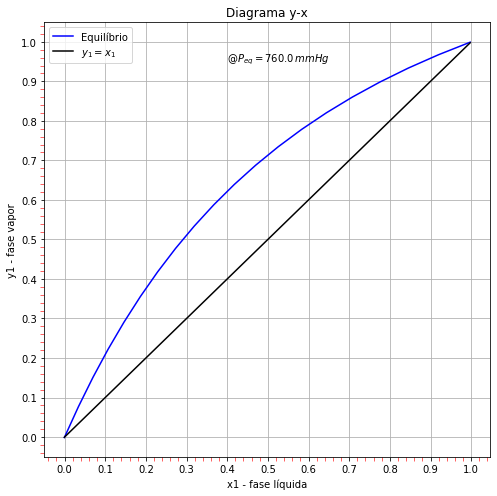

In [ ]:
# Fazendo o diagrama y-x
fig1, ax1 = plt.subplots( figsize =(8,8))
ax1.plot(dados_elv['x1'], dados_elv['y1'], 'b', label='Equilíbrio')
ax1.plot(dados_elv['x1'], dados_elv['x1'], 'k', label= r'$y_1 = x_1$')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('x1 - fase líquida')
ax1.set_ylabel('y1 - fase vapor')
# Adicionando título para a figura
ax1.set_title('Diagrama y-x')
# Adicionando um texto
ax1.text(0.4, 0.95, r'@$P_{eq} = 760.0 \, mmHg$')
# Adicionando uma legenda
ax1.legend()
# Adicionando linha vertical
#ax1.vlines(z[0],T_Pb, T_Po, colors='m', linestyles='dashed')
#ax1.axvline(sol_flash['x_eq'][0])
#ax1.axvline(sol_flash['y_eq'][0])
# Adicionando linha horizontal
#ax1.hlines(T_flash,0, 1, colors='y', linestyles='solid')
# Adicionando grade
ax1.grid()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax1.xaxis.set_major_locator(MultipleLocator(0.10))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.yaxis.set_major_locator(MultipleLocator(0.10))
ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(which='minor', length=4, color='r')
#ax1.grid(True, which='minor')

In [ ]:
# Fazendo o Flash
z = np.array([0.5, 0.5])
T_flash = 95 + 273.15 # K
sol_flash = f_sol_RR_flash_db(z, P_eq, T_flash, lista_componentes, dados)
sol_flash

{'K_comp': array([1.54838835, 0.62744758]),
 'alpha_comp': array([2.46775733, 1.        ]),
 'fv_flash': 0.43033037783267614,
 'x_eq': array([0.40453462, 0.59546538]),
 'y_eq': array([0.62637669, 0.37362331])}

## Reta do flash

Considerando que o componente de índice 1 (0 para o Python) é o componente mais volátil.

$$ y_1 = - \bigg( \frac{1 - f_V}{f_V} \bigg) \cdot x_1 + \frac{1}{f_V} \cdot z_1$$

In [ ]:
def f_reta_flash(x1, z1, fv):
    a = -(1.0 - fv)/ fv
    b = z1/fv
    y1 = a*x1 + b
    return y1

In [ ]:
x1_graf = np.linspace(0,1,20)
y1_rf_graf = f_reta_flash(x1_graf,z[0], sol_flash['fv_flash'])

In [ ]:
# reta do pinch 

pinch_dot = sol_flash

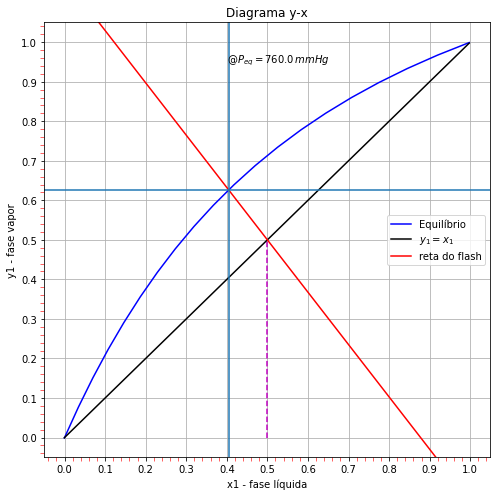

In [ ]:
# Fazendo o gráfico
fig1, ax1 = plt.subplots( figsize =(8,8))
ax1.plot(dados_elv['x1'], dados_elv['y1'], 'b', label='Equilíbrio')
ax1.plot(dados_elv['x1'], dados_elv['x1'], 'k', label= r'$y_1 = x_1$')
ax1.plot(x1_graf, y1_rf_graf, 'r', label= 'reta do flash')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('x1 - fase líquida')
ax1.set_ylabel('y1 - fase vapor')
# Limites para o eixo
plt.ylim((-0.05,1.05))
# Adicionando título para a figura
ax1.set_title('Diagrama y-x')
# Adicionando um texto
ax1.text(0.4, 0.95, r'@$P_{eq} = 760.0 \, mmHg$')
# Adicionando uma legenda
ax1.legend()
# Adicionando linha vertical
ax1.vlines(z[0],0, z[0], colors='m', linestyles='dashed')
ax1.axvline(sol_flash['x_eq'][0])
ax1.axhline(sol_flash['y_eq'][0])
# Adicionando linha horizontal
#ax1.hlines(T_flash,0, 1, colors='y', linestyles='solid')
# Adicionando grade
ax1.grid()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax1.xaxis.set_major_locator(MultipleLocator(0.10))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.yaxis.set_major_locator(MultipleLocator(0.10))
ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(which='minor', length=4, color='r')
#ax1.grid(True, which='minor')

Definindo as equações do método McCabe-Thiele:

$$(1) \ Rozer: y_1^{n+1} = \frac{L^1}{V^1} \cdot x_1^n \ + \ \frac{D \cdot x_1^D}{V^1}  $$
$$(2) \ Rozeg: y_1^{n+1} = \frac{L^n}{V^"} \cdot x_1^n \ + \ \frac{B \cdot x_1^B}{V^"}  $$
$$(3) \ Op. Flash: y_1 = - \bigg( \frac{1 - f_V}{f_V} \bigg) \cdot x_1 + \frac{1}{f_V} \cdot z_1  $$




Como esse método se trata de um método gráfico, devemos marcar os pontos necessários para que possamos traçar as retas no diragrama y-x e encontrarmos os estágios de equilíbrio.

Dessa forma os pontos de acordo com as equações acima são:

$$ Ponto\ 1: y = x_1^D \ na \ reta \ y=x $$
$$ Ponto\ 2: y = \frac{x_1^D}{R_d+1} \ no \ eixo \ y $$
$$ Ponto\ 3: y = x_1^B \ na \ reta \ y=x $$
$$ Ponto\ 4: y = z_1^F \ na \ reta \ y=x $$

O Ponto 5 será encontrado na interseção de todas as 3 retas.

In [ ]:
# Definindo os pontos do método McCabe-Thiele:

# Ponto 1:

x_1_d = 0.95 # referente a fração do benzeno na corrente de destilado.

Para o ponto 2 nos foi dado a informação de uma porcentagem de razão de refluxo mínima, na qual iremos calcular nossa razão de refluxo total, dada por:

$$ (4)\ R_D = f_{op} \cdot R_d^{min} $$

Sendo: 

$$ f_{op} = 1.3$$

E que: 

$$ (5)\ R_d^{min} = \frac{x_1^D}{y_{max}^{pinch}} - 1$$

Se observarmos o gráfico 2, veremos que o valor de y no pinch será encontrado através da reta que passa pelo ponto 1, pelo ponto de pinch e rebatendo no eixo y. Nesse caso, 0.36. 



In [ ]:
# Ponto 2: 

R_min = (0.95/0.36) - 1 
R_d = R_min*1.3
print(R_d)
y_p2 = x_1_d/(R_d +1)
print(y_p2)

2.1305555555555555
0.30346051464063883


In [ ]:
# Ponto 3:

y_p3 = 1 - x_1_d
y_p3

0.050000000000000044

In [ ]:
# Ponto 4:
y_p4 = z[0]
y_p4

0.5

Gráfico com as retas e pontos traçados:

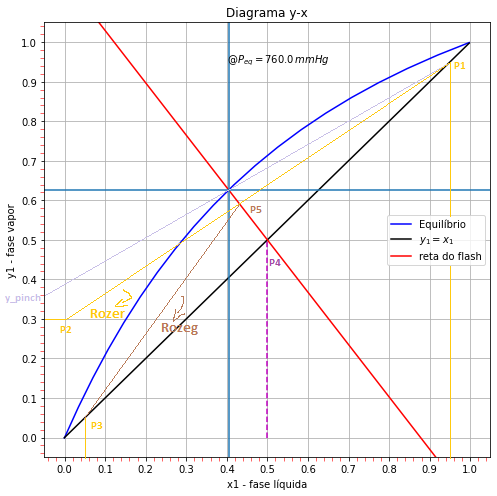

Gráfico com os estágios de equilíbrio:

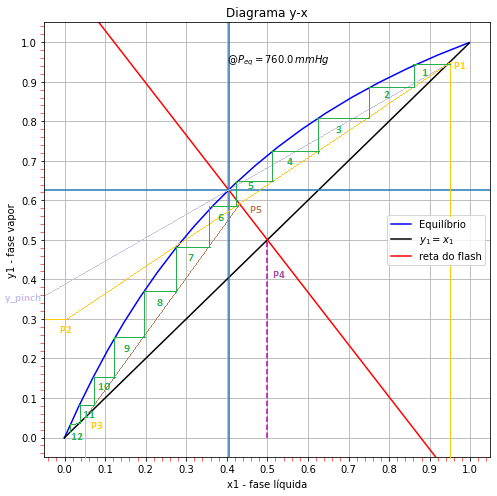

Observamamos por esse método gráfico que temos:

- 12 estágios teóricos 
- 6 estágios de alimentação